In [1]:
import numpy as np

## bias variance tradoff

![title](image3.png)

## cros validation

In [15]:
k = 5
data = np.random.uniform(size=1500)
y = np.random.uniform(size=1500)

In [19]:
folds = [data[i::5] for i in range(5)]
folds_y = [y[i::5] for i in range(5)]

In [21]:
x = list(range(5))
train = np.array([folds[j] for j in x]).flatten()
train.shape

(1500,)

In [22]:
for d in range(10):
    loss = 0
    for i in range(5):
        x = list(range(5))
        x.remove(i)
        train = np.array([folds[j] for j in x]).flatten()
        test = np.array(folds[i])
        test = [[t**k for k in range(d+1)] for t in test]

        train_y = np.array([folds_y[j] for j in x]).flatten()
        test_y = np.array(folds_y[i])

        param = np.polyfit(train, train_y, deg=d)
        predicted = [np.array(t).dot(np.array(param[::-1])) for t in test]
        loss += sum([(predicted[index] - test_y[index])**2 for index in range(len(predicted))])/len(predicted)
    print("mean loss", loss*1000)

mean loss 414.607462111
mean loss 415.320535763
mean loss 415.881755434
mean loss 416.036412015
mean loss 416.340994297
mean loss 417.338123951
mean loss 417.717927176
mean loss 418.563185663
mean loss 418.647314723
mean loss 416.966938805


## homework

Implement regularized regression

Find best polynomial degree for generated data with cross validation

## bonus

Plot bias, variance and error

# Regularization in Linear Regression

## Introduction 
Linear regression is very popular statistical model that is used to represent the relationship between some outcome variable $y_i$ and covariates (also known as features, explanatory variables, and independent variables) $x = (x_{1i}, x_{2i}, \ldots, x_{ki})$ using linear weights $\hat{\beta} = (\hat{\beta_{0}}, \hat{\beta_{1}}, \ldots, \hat{\beta_{k}}).$ The weights are choosen in a way such that the function $$f(x_{i};\hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + \ldots + \hat{\beta_{k}}x_{ki},$$ for $i = 1, \ldots, n$ best fits the data. Note that $\beta$ is a unknown regression parameter, and $\hat{\beta}$ is its estimate from a learning algorithm. That is the model $f(x_{i};\hat{\beta})$ is estimating the following assumed true linear relationsthip between $y_{i}$ and $x_{i},$
$$y_{i} = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki} + \epsilon_{i},$$ where $\epsilon_{i}$ is a mean zero stochastic error term. The "linear" in linear regression means that the model is linear in the parameters, so $y_{i} = \beta_{0} + \beta_{1}x_{i}^2$ is a linear model, but $y_{i} = \beta_{0}x_{i}^{\beta_{1}}$ is nonlinear in parameters. 


This function can be used to predict outcome $y_{i}$ given any covariates $x_{1i}, \ldots, x_{ki}.$ However a caveat for using linear regression with many covariates for prediction is that the model may "overfit" the data and may not be generalizable. Overfitting occurs when the model captures too much of the noise in the data which cannot generalize outside of sample. We will discuss a popular remedy to the overfitting problem, regularization. Intuitively speaking, regularlization is a method of changing the standard definition of a model "best fitting" the data in a way that its predictions are more generalizable to new data sets. 

## Overfitting in linear regression

Overfitting is often a result of the model having too many parameters relative to the training data. Suppose we want to model the relationship between a outcome $y$ and covariate $x$ using $n$ data points. In this case, a $n-1$ degree polynomial in $x$ will perfectly fit the relationship between $y$ and $x$.

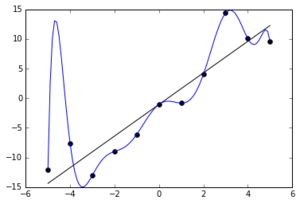

In [146]:
from IPython.display import Image, display
display(Image(filename='OverfittedData.png', embed=True))

In the figure above, from the black line we see a linear relationship between $y_{i}$ and $x_{i}$ for $i = 1, \ldots,11.$ Although the black line is a decent fit to the data, notice that the $10$ degree polynomial perfectly fits the data. Notice that the black line consists of two parameters $\alpha = (\alpha_{0},\alpha_{1})$ with a estimated function $g(x_{i};\hat{\alpha}) = \hat{\alpha_{0}} + \hat{\alpha_{1}}x_{i},$ whereas the blue polynomial consists of ten parameters, $\beta = (\beta_{0}, \beta_{1}, \ldots, \beta_{10})$ with a estimated function $f(x_{i}; \hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i} + \ldots + \hat{\beta_{10}}x_{i}^{10}.$ Looking at the above plot, if we wanted to make a prediction for $y_{i}$ given $x_{i} = 10$, then $g(10;\hat{\alpha})$ will likely be more accurate then $f(10;\hat{\beta}).$ This is because $f(x_{i};\hat{\beta})$ is going to be decreasing function for large $x_{i}$ even though there is a positive relationship between $y_{i}$ and $x_{i}$. To summarize, if we were given more data to further examine the relationship between $y_{i}$ and $x_{i}$ above, it wouldn't be suprising if the simple black line above fit the data set better than the same $10$ degree blue polynomial. 

## Measuring fitness of a linear model

In this section we will discuss formally how a models fitness to the data is measured. Given our linear regression model $f(x_{i};\beta)$ and the outcome data $y_{i}$ we need to define a error function $Error(\beta).$ The most commonly used error function for the linear regression model is the square loss function, $$Error(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2,$$ where $f(x_{i};\beta) = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki}$ is a linear regression model. The smaller $Error(\beta)$ is, the better $f(x_{i};\beta)$ fits the data. Therefore $\beta$ is estimated for a linear regression model such that it minimizes $Error(\beta),$ that is $$\hat{\beta} = \text{argmin}_{\beta} \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2.$$
Therefore our learning algorithm for estimating $\beta$ is to minimize some known loss function, this will give us our estimated linear regression model $f(x_{i}, \hat{\beta}).$

## L1 and L2 Regularization methods

Suppose we are trying to model the relationship between $y_{i}$ and $x_{i}$ using a high degree polynomial (10 degrees for example). If we minimize $Error(\beta)$ above (square loss) to estimate our model, then this model is prone to overfitting if the higher order terms are assigned large weights to caputure noise in the data. The simple idea behind regularization is that we add a penalty function to the standard square loss function so that learning algorithm doesn't easily assign large weights to the higher order covariates. The $L1$ regularized error function is $$Error_{L1}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,$$ and the $L2$ regualirized error function is $$Error_{L2}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2},$$ where $\lambda$ is the regularization parameter. Note that using the $L1$ loss function is known as lasso regression, and using the $L2$ loss function is known as ridge regression. The regularized terms $\frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,\frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2}$ in the $L1$ and $L2$ loss functions respectively shrink the parameters $(\beta_{1}, \ldots, \beta_{k})$ towards 0 (notice the intercept $\beta_{0}$ is excluded from the regularized term). Suppose the true relationship between $y_{i}$ and $x_{i}$ is quadratic, then regularization should prevent our 10 degree polynomial from overfitting as now the higher degree terms will likely be assigned lower weight than if we had used the standard sqaure loss $Error(\beta).$ The tuning parameter $\lambda$ is usually determined by using a methadology known as cross validation. We will leave cross validation for a future notebook, for now we will just set $\lambda = 5.$

## Applying regularization methods

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def generate_data(num_features, noise):

    from sklearn.datasets import make_regression
    # generate regression dataset
    x, y = make_regression(n_samples=15, n_features=num_features, noise=noise,  bias=8.)
    return np.array(x), np.array(y)

## Data

(15, 1)
(15,)


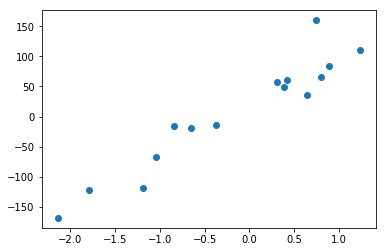

In [135]:
X, y = generate_data(1, 40)
print(X.shape)
print(y.shape)
# Visualize data
plt.scatter(X, y)
plt.show()

## Estimating linear model parameters

Optimization algorithms such as gradient descent or newton's method can be used to minimize a given loss function and estimate the parameters in our linear model. However since the main purpose of this notebook is to illustrate regularization methods, for code simplicity we will use well known closed form solutions to implement standard linear regression and $L2$ regularization. Using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{k1}\\
    \vdots & \vdots & \ldots & \vdots \\
    1 & x_{12} & \ldots & x_{k2}\\
    1 & x_{1n} & \ldots & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$ and for the $L2$ regularized loss function the closed form solution is $\hat{\beta} = (X'X + \lambda I)^{-1}X'y,$ where I = 
$
\begin{bmatrix}
    0 & 0 & \ldots & 0\\
    0 & 1 & \ldots & 0\\
    0 & 0 & 1 & 0 \\
    \vdots & \vdots & \ldots & \vdots \\
    0 & 0 & \ldots & 1
\end{bmatrix}. 
$
Note that the $L1$ regularized loss function doesn't have a closed form solution for the parameters so we have to use numerical methods to implement it. We will not be implementing the $L1$ regularized method here since the result will likely be similar to $L2$ for our small data set. As mentioned above, we will pick $\lambda = 5,$ and discuss a more formal method of choosing this tuning parameter in a future notebook.


## Deriving the closed form solutions
It's actually intuitive to formulate the closed form solutions showed for the standard linear and ridge regression. For ridge regression, the matrix representation of the $L2$ loss function is $$Error_{L2}(\beta) = \frac{1}{2}(f(x;\beta) - y)'(f(x;\beta) - y)+\frac{\lambda}{2}\beta'\beta,$$ where $y$ is outcome vector, $f(x,\beta) = X\beta$ is vector of linear model predictions, and $\beta$ is parameter vector. To estimate $\beta$, we minimize $Error_{L2}(\beta)$ and hence compute $\frac{d Error_{L2}(\beta)}{d\beta} = 0.$ After differentiation $Error_{L2}(\beta)$ with respect to $\beta$ we can obtain $$X'X\beta-X'y+\lambda I\beta = 0,$$ and rearranging the above equation results in $\hat{\beta} = (X'X + \lambda I)^{-1}X'y$, the closed form solution for ridge regression. The closed form solution for the standard linear regression with square loss can be derived in a similar manner. 

In [136]:
def estimate_model(y, X, Lambda):
    
    Xtranspose = np.matrix.transpose(X)
    Identity = np.identity(len(X[1,:]))    
    Identity[0,0] = 0
    
    return np.dot(np.linalg.inv(np.add(np.dot(Xtranspose,X),Lambda*Identity)),np.dot(Xtranspose,y))

def mean_square_loss(X, Y, b, Lambda):

    return np.sum((X.dot(b) - Y)**2)/(2*len(Y)) + (Lambda/2)*b.transpose().dot(b)

In [137]:
# X with bias
ones = np.ones(len(y))
X_with_bias = np.column_stack((ones,X))

# for simple linear regression model
beta_simple = estimate_model(y, X_with_bias, 0)
print("My model result : ", beta_simple)

# for cross checking
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg = reg.fit(X, y)
print("Sklearn model result : ", reg.intercept_, reg.coef_)

My model result :  [21.30387568 84.45278128]
Sklearn model result :  21.303875676284903 [84.45278128]


In [138]:
# Estimate a five degree linear regression model (using standard square loss function)
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

beta_poly = estimate_model(y, X_poly, 0)
print("My model result : ", beta_poly)


My model result :  [27.90114112 83.83709219 -9.09181584 -2.87749459]


In [139]:
# Lambda = 5 as the tuning parameters for L2 regularization
beta_L2_5 = estimate_model(y, X_poly,0)

print("My model result : ", beta_L2_5, "mean ", mean_square_loss(X_poly, y, beta_L2_5, 5))

My model result :  [27.90114112 83.83709219 -9.09181584 -2.87749459] mean  20110.158642899438


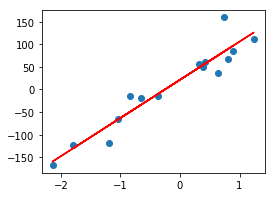

In [140]:
plt.clf()
plt.figure(figsize=(4,3))
plt.scatter(X, y)
plt.plot(X, X_with_bias.dot(beta_simple),  color="red")
plt.show()



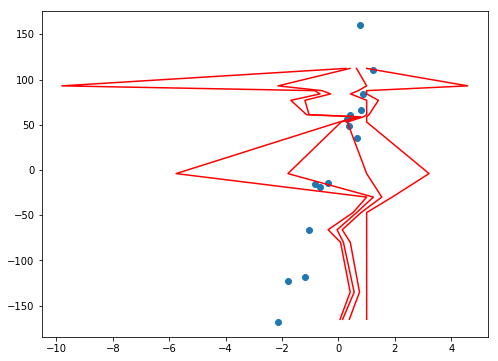

In [146]:
plt.clf()
plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(np.sort(X_poly), np.sort(X_poly.dot(beta_poly)),  color="red")
plt.show()

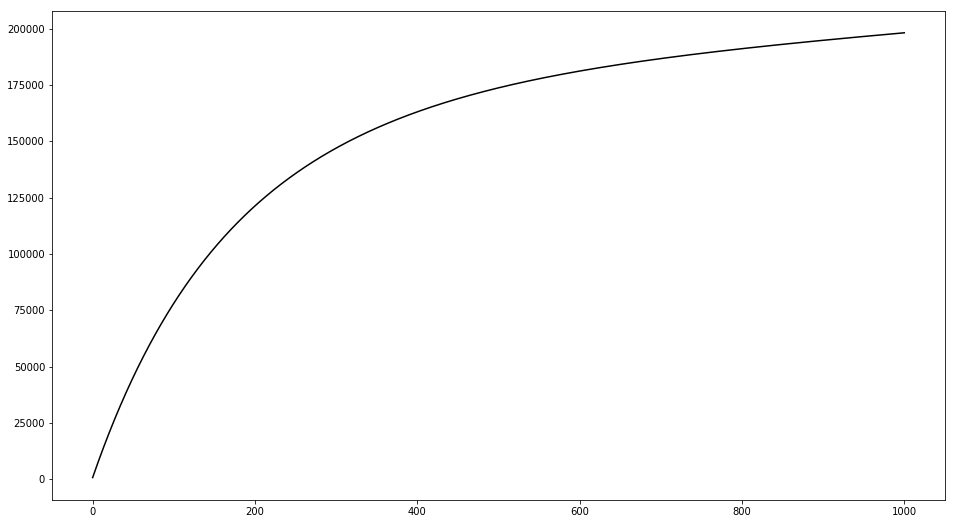

In [113]:
means = []
for l in np.arange(0, 1000, 0.1):
    beta = estimate_model(y, X_poly, l)
    mean = mean_square_loss(X_poly, y, beta, l)
    means.append(mean)
plt.clf()
plt.figure(figsize=(16,9))
plt.plot(np.arange(0, 1000, 0.1), means, color="black", label="Loss train")
plt.show()
    

In [144]:
beta_poly[0] + X_poly*beta_poly[1] + X_poly*beta_poly[2] 
X_poly.dot(beta_poly)

array([  58.84493256,   84.20435332,   61.23105641,   -3.91972227,
         87.80471105,  112.37243233, -134.97526657,   53.13948613,
         93.08950826,  -66.00992119,  -79.90598746,  -29.89388865,
        -47.01356628, -164.97160484,   77.10687621])